<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [2]:
df_train = pd.read_csv("../DLS/game_of_thrones_train.csv", index_col='S.No')
df_train.info()

FileNotFoundError: [Errno 2] No such file or directory: '../DLS/game_of_thrones_train.csv'

In [775]:
df_train.sample(10)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
76,Raymond Nayland,Ser,0,NaN,NaN,NaN,NaN,NaN,House Nayland,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.016722,1
449,Del,NaN,0,Free Folk,283.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,16.0,0,0.013378,0
974,Dagon Greyjoy,Lord Reaper of Pyke,1,Ironborn,NaN,NaN,NaN,NaN,House Greyjoy,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.073579,1
1441,Waltyr Frey,NaN,1,NaN,289.0,NaN,NaN,NaN,House Frey,NaN,...,NaN,NaN,NaN,NaN,0,0,16.0,0,0.050167,1
519,Gallard,Archmaester,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.010033,1
1202,Maegelle Frey,NaN,0,NaN,249.0,NaN,NaN,NaN,House Frey,Dafyn Vance,...,NaN,NaN,NaN,1.0,1,0,56.0,0,0.107023,1
1409,Tybolt Crakehall,Ser,1,NaN,NaN,NaN,NaN,NaN,House Crakehall,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.023411,1
1506,Galbart Glover,Master of Deepwood Motte,1,Northmen,NaN,NaN,NaN,NaN,House Glover,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.120401,1
801,Myrtle,NaN,0,Free Folk,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.046823,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

<Axes: xlabel='S.No'>

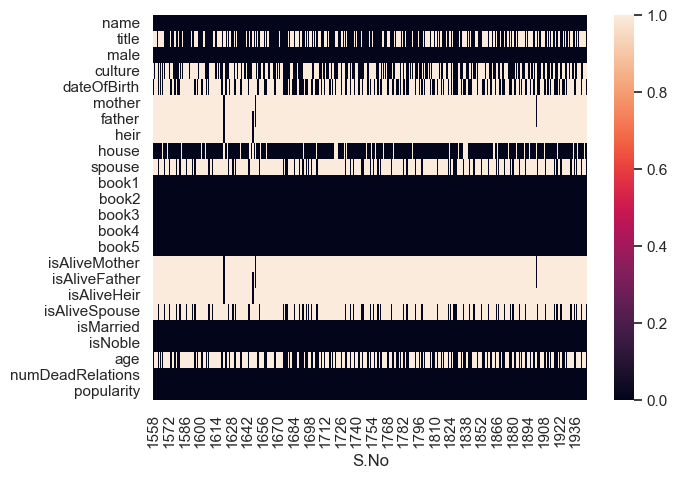

In [753]:
plt.figure(figsize=(7,5))
sns.heatmap(df_train.isna().transpose())

In [754]:
df_train['spouse'].fillna(0, inplace=True)
df_train.loc[df_train['spouse'] != 0, 'spouse'] = 1
df_train['spouse'].value_counts()

spouse
0    313
1     76
Name: count, dtype: int64

In [755]:
df_train['title'].value_counts()

title
Ser                      78
Maester                  10
Princess                  7
Bloodrider                3
Knight                    3
                         ..
Lord Steward              1
The NorreyLord Norrey     1
Lord of Blackhaven        1
Blacktyde                 1
Slave of R'hllor          1
Name: count, Length: 109, dtype: int64

In [756]:
df_train['title'].fillna('No info', inplace=True)
df_train['title'] = df_train['title'].replace(df_train[~df_train['title'].isin(
    df_train['title'].value_counts().keys().to_list()[:int(df_train['culture'].value_counts().shape[0] * 0.5)])]['title'].tolist(), 'Rare')       

In [757]:
df_train['title'].value_counts()

title
No info              168
Rare                  86
Ser                   78
Maester               10
Princess               7
Bloodrider             3
Knight                 3
Winterfell             2
Prince                 2
Hand of the King       2
Casterly Rock          2
Lord of Harrenhal      2
Eyrie                  2
Lady                   2
Septon                 2
Andals                 2
First Ranger           2
Barrowton              2
Sunspear               2
Storm's End            2
Grand Maester          2
Highgarden             2
Khal                   2
Hightower              1
Dreadfort              1
Name: count, dtype: int64

In [758]:
df_train['house'].value_counts()[:15]

house
House Targaryen                22
House Martell                  18
Night's Watch                  17
House Stark                    16
House Lannister                13
House Greyjoy                  11
Brave Companions                9
House Frey                      8
Brotherhood without banners     7
House Bolton                    7
House Baratheon                 7
House Clegane                   5
House Bracken                   5
House Arryn                     5
House Manderly                  5
Name: count, dtype: int64

In [759]:
df_train['house'].fillna('No info', inplace=True)
df_train['house'] = df_train['house'].replace(df_train[~df_train['house'].isin(
    df_train['house'].value_counts().keys().to_list()[:int(df_train['culture'].value_counts().shape[0] * 0.5)])]['house'].tolist(), 'Rare')   
df_train['house'].value_counts()

house
Rare                           158
No info                         46
House Targaryen                 22
House Martell                   18
Night's Watch                   17
House Stark                     16
House Lannister                 13
House Greyjoy                   11
Brave Companions                 9
House Frey                       8
House Baratheon                  7
Brotherhood without banners      7
House Bolton                     7
House Bracken                    5
House Arryn                      5
House Manderly                   5
House Clegane                    5
House Mormont                    4
House Tully                      4
House Hightower                  4
House Blackfyre                  4
House Whent                      4
House Royce                      4
House Florent                    3
House Velaryon                   3
Name: count, dtype: int64

<Axes: xlabel='S.No'>

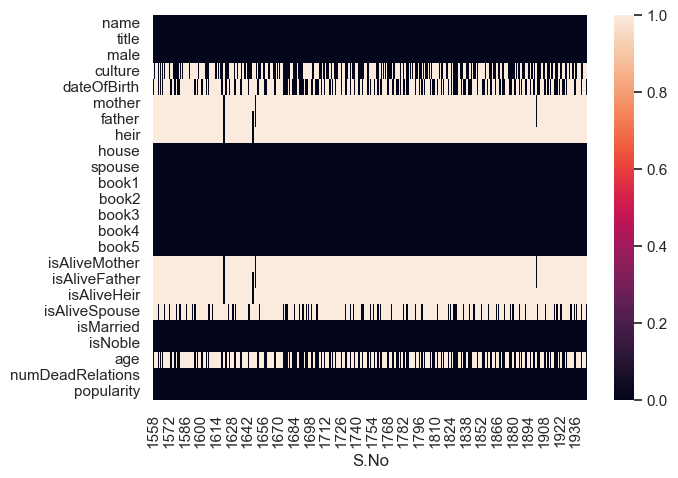

In [760]:
plt.figure(figsize=(7,5))
sns.heatmap(df_train.isna().transpose())

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [761]:
df_train.loc[df_train['popularity'] >= 0.5, 'popularity'] = 1
df_train.loc[df_train['popularity'] != 1, 'popularity'] = 0

df_train.loc[df_train['numDeadRelations'] > 0, 'numDeadRelations'] = 1
df_train = df_train.rename(columns={'numDeadRelations': 'boolDeadRelations', 'popularity': 'isPopular'})
df_train

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,boolDeadRelations,isPopular
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,No info,0,NaN,156.0,NaN,NaN,NaN,Rare,0,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.0
1559,Melisandre,No info,0,Asshai,NaN,NaN,NaN,NaN,Rare,0,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,1.0
1560,Merrit,No info,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,0,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.0
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,Rare,0,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.0
1562,Merrett Frey,No info,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,1,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,No info,1,Westeros,NaN,NaN,NaN,NaN,House Stark,0,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.0
1943,Reek,No info,1,NaN,NaN,NaN,NaN,NaN,House Bolton,0,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.0
1944,Symeon Star-Eyes,No info,1,NaN,NaN,NaN,NaN,NaN,No info,0,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.0


In [762]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

culture = df_train['culture']
for key in cult:
    for index in culture.index:
        if culture[index] in cult[key]:
            culture[index] = key
df_train['culture'] = culture

In [763]:
int(df_train['culture'].value_counts().shape[0]*0.1)

4

In [764]:
df_train['culture'].fillna('No info', inplace=True)
df_train['culture'] = df_train['culture'].replace(df_train[~df_train['culture'].isin(
    df_train['culture'].value_counts().keys().to_list()[:int(df_train['culture'].value_counts().shape[0] * 0.5)])]['culture'].tolist(), 'Rare')   
df_train['culture'].value_counts()

culture
No info                    200
Northmen                    30
Rare                        27
Ironborn                    21
Valyrian                    15
Dornishmen                  11
Westeros                     9
Rivermen                     9
Valemen                      9
Ghiscari                     8
Dornish                      8
Dothraki                     6
Free Folk                    6
Free folk                    4
Reach                        3
Braavosi                     3
Vale mountain clans          3
Stormlands                   3
Asshai                       2
Ironmen                      2
Northern mountain clans      2
Lysene                       2
Pentoshi                     2
Wildlings                    2
Lyseni                       2
Name: count, dtype: int64

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [765]:
df_train.drop(['name', 'mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'age', 'dateOfBirth'], axis = 1, inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

1's counts = 77.84200385356455%


<Axes: >

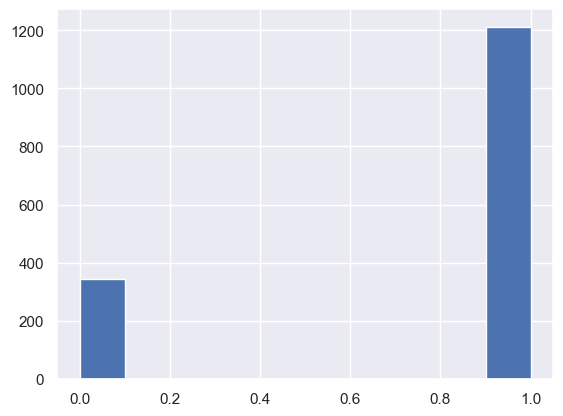

In [727]:
print(f"1's counts = {df_train['isAlive'].value_counts()[1]/df_train['isAlive'].count()*100}%")
df_train['isAlive'].hist()

In [728]:
#df_trin = df_train.copy()
#print(f"1's counts = {df_trin['isAlive'].value_counts()[1]/df_trin['isAlive'].count()*100}%")
#df_trin = df_trin[(df_trin['title'] != 'No Info') | (df_trin['isAlive'] != 1)]
#print(f"1's counts = {df_trin['isAlive'].value_counts()[1]/df_trin['isAlive'].count()*100}%")
#df_trin['isAlive'].hist()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [729]:
df_train.head()

,title,male,culture,house,spouse,book1,book2,book3,book4,book5,isMarried,isNoble,boolDeadRelations,isPopular,isAlive
S.No,,,,,,,,,,,,,,,
1,No info,1,No info,No info,0,0,0,0,0,0,0,0,1,1.0,0
2,Rare,1,Rivermen,House Frey,1,1,1,1,1,1,1,1,1,1.0,1
3,Ser,1,No info,Rare,0,0,0,0,1,0,0,1,0,0.0,1
4,Rare,0,No info,House Arryn,1,0,0,0,0,0,1,1,0,0.0,0
5,Rare,0,Dornish,Rare,1,0,0,0,1,0,1,1,0,0.0,1


In [766]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoding = LabelEncoder()

# Fit and transform the categorical data
for column in ['title', 'culture', 'house']:
  df_train[column] = label_encoding.fit_transform(df_train[column])

In [767]:
df_train

,title,male,culture,house,spouse,book1,book2,book3,book4,book5,isMarried,isNoble,boolDeadRelations,isPopular
S.No,,,,,,,,,,,,,,
1558,16,0,12,24,0,0,0,0,0,1,0,0,0,0.0
1559,16,0,0,24,0,0,1,1,1,1,0,0,0,1.0
1560,16,0,12,1,0,0,0,1,1,0,0,0,0,0.0
1561,21,1,12,24,0,1,1,1,1,1,0,1,0,0.0
1562,16,1,16,9,1,1,1,1,1,1,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,16,1,23,17,0,1,1,1,1,1,0,0,0,0.0
1943,16,1,12,5,0,0,1,0,1,1,0,0,0,0.0
1944,16,1,12,23,0,1,1,1,1,1,0,0,0,0.0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [768]:
df_train = df_train.astype({"isPopular": "int16", "spouse": "int16"})
df_train

,title,male,culture,house,spouse,book1,book2,book3,book4,book5,isMarried,isNoble,boolDeadRelations,isPopular
S.No,,,,,,,,,,,,,,
1558,16,0,12,24,0,0,0,0,0,1,0,0,0,0
1559,16,0,0,24,0,0,1,1,1,1,0,0,0,1
1560,16,0,12,1,0,0,0,1,1,0,0,0,0,0
1561,21,1,12,24,0,1,1,1,1,1,0,1,0,0
1562,16,1,16,9,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,16,1,23,17,0,1,1,1,1,1,0,0,0,0
1943,16,1,12,5,0,0,1,0,1,1,0,0,0,0
1944,16,1,12,23,0,1,1,1,1,1,0,0,0,0


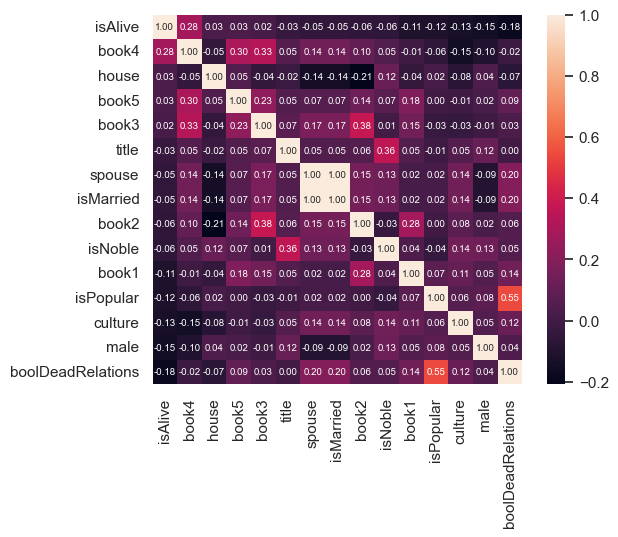

In [733]:
# correlation matrix
corrmat = df_train.corr()
k = 16 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [769]:
df_train = df_train.drop(columns=['spouse'])

In [735]:
X = df_train.drop(columns=['isAlive']).values
y = df_train['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [736]:
#from sklearn.model_selection import train_test_split

In [737]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [738]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [739]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [740]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [741]:
from sklearn.metrics import accuracy_score

In [749]:
from sklearn.model_selection import GridSearchCV 
"""
model = DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy', 'log_loss'], 
              'max_depth': np.arange(1, 15), 
            'min_samples_leaf': [1,2, 3, 5, 10]}

grid_clf = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
grid_clf.fit(X, y)

print(grid_clf.best_estimator_)
print(grid_clf.best_params_)
print(grid_clf.best_score_)

model = AdaBoostClassifier()
parameters = {'n_estimators': np.arange(1, 100)}

grid_clf = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
grid_clf.fit(X, y)

print(grid_clf.best_estimator_)
print(grid_clf.best_params_)
print(grid_clf.best_score_)

"""
model = RandomForestClassifier()
parameters = {'criterion': ['log_loss'],
             'max_depth': [13], 
            'min_samples_leaf': [3],
             'n_estimators': [40, 45, 50, 55, 60],
             'max_leaf_nodes': [1,2,3,5,10,'None']}

grid_clf = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
grid_clf.fit(X, y)

print(grid_clf.best_estimator_)
print(grid_clf.best_params_)
print(grid_clf.best_score_)

"""
model = DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy', 'log_loss'], 
              'max_depth': np.arange(1, 20), 
            'min_samples_leaf': [1,2, 3, 5, 10]}

grid_clf = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
grid_clf.fit(X, y)

print(grid_clf.best_estimator_)
print(grid_clf.best_params_)
print(grid_clf.best_score_)

model = DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy', 'log_loss'], 
              'max_depth': np.arange(1, 15), 
            'min_samples_leaf': [1,2, 3, 5, 10]}

grid_clf = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
grid_clf.fit(X, y)

print(grid_clf.best_estimator_)
print(grid_clf.best_params_)
print(grid_clf.best_score_)
"""

RandomForestClassifier(criterion='log_loss', max_depth=13, max_leaf_nodes=10,
                       min_samples_leaf=3, n_estimators=45)
{'criterion': 'log_loss', 'max_depth': 13, 'max_leaf_nodes': 10, 'min_samples_leaf': 3, 'n_estimators': 45}
0.8021559897765685


C:\Users\Санек\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Санек\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Санек\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Санек\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.p

"\nmodel = DecisionTreeClassifier()\nparameters = {'criterion': ['gini', 'entropy', 'log_loss'], \n              'max_depth': np.arange(1, 20), \n            'min_samples_leaf': [1,2, 3, 5, 10]}\n\ngrid_clf = GridSearchCV(model, parameters, cv=5, scoring='accuracy')\ngrid_clf.fit(X, y)\n\nprint(grid_clf.best_estimator_)\nprint(grid_clf.best_params_)\nprint(grid_clf.best_score_)\n\nmodel = DecisionTreeClassifier()\nparameters = {'criterion': ['gini', 'entropy', 'log_loss'], \n              'max_depth': np.arange(1, 15), \n            'min_samples_leaf': [1,2, 3, 5, 10]}\n\ngrid_clf = GridSearchCV(model, parameters, cv=5, scoring='accuracy')\ngrid_clf.fit(X, y)\n\nprint(grid_clf.best_estimator_)\nprint(grid_clf.best_params_)\nprint(grid_clf.best_score_)\n"

In [704]:
decision_tree_c = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 1)
decision_tree_c.fit(X,y)
y_pred_tree = decision_tree_c.predict(X)
accuracy = accuracy_score(y_test, y_pred_tree)
print("Accuracy : %.4f" % accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [312, 1557]

In [515]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression()

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

C:\Users\Санек\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
decision_tree_c = DecisionTreeClassifier()
decision_tree_c.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
ada_boost = AdaBoostClassifier()
rand_forest = RandomForestClassifier()
gaussian_pc = GaussianProcessClassifier()
gaussian_nb = GaussianNB()
knn_c = KNeighborsClassifier()
svc = SVC()
decision_tree_c = DecisionTreeClassifier()
# Шаг 2. обучение модели

ada_boost.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
gaussian_pc.fit(X_train, y_train)
gaussian_nb.fit(X_train, y_train)
knn_c.fit(X_train, y_train)
svc.fit(X_train, y_train)
decision_tree_c.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных

y_pred_ada = ada_boost.predict(X_test)
y_pred_rand = rand_forest.predict(X_test)
y_pred_gaussian_pc = gaussian_pc.predict(X_test)
y_pred_gaussian_nb = gaussian_nb.predict(X_test)
y_pred_knn_c = knn_c.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = decision_tree_c.predict(X_test)


## Часть 3. Оцените качество моделей

In [ ]:
# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy LogisticRegression: %.4f" % accuracy_score(y_test, y_pred))
print("Accuracy AdaBoostClassifier : %.4f" % accuracy_score(y_test, y_pred_ada))
print("Accuracy RandomForestClassifier: %.4f" % accuracy_score(y_test, y_pred_rand))
print("Accuracy GaussianProcessClassifier: %.4f" % accuracy_score(y_test, y_pred_gaussian_pc))
print("Accuracy GaussianNB: %.4f" % accuracy_score(y_test, y_pred_gaussian_nb))
print("Accuracy KNeighborsClassifier: %.4f" % accuracy_score(y_test, y_pred_knn_c))
print("Accuracy SVC: %.4f" % accuracy_score(y_test, y_pred_svc))
print("Accuracy DecisionTreeClassifier: %.4f" % accuracy_score(y_test, y_pred_tree))


In [770]:
from sklearn.preprocessing import MinMaxScaler

X = df_train.values

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

y_pred = grid_clf.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [771]:
submission = pd.read_csv("../DLS/submission.csv", index_col='S.No')
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [772]:
submission['isAlive'] = y_pred
submission

,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


In [773]:
submission.to_csv("../DLS/new1_submission.csv", index=False)

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.